# **Assisted Practice: MNIST Digit Classifier CNN with PyTorch**

In this example, we develop and train a deep learning model utilizing the MNIST dataset, which comprises 28x28 grayscale images of handwritten digits from 0 to 9. The model, a fully connected neural network, is meticulously designed to classify these images into their respective digit categories. We employ PyTorch, a powerful and flexible deep learning framework, to facilitate our implementation.

## Steps to be followed:
- Import necessary libraries
- Data Transformation and Loading
- Display Sample Image
- Define the Neural Network
- Set Up Loss Function and Optimize
- Testing the Model
- Display Prediction on Test Data

### Step 1: Import necessary libraries

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

### Step 2: Data Transformation and Loading
- Define transformations that convert image data to tensor and normalize it.
- Load the MNIST dataset for training and testing.
- Create DataLoader objects that provide batches of images and labels for training and testing, shuffling the training data to improve learning.

In [2]:
# Data transformation and loading
transform_nm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data_nm = datasets.MNIST(root='./data', train=True, transform=transform_nm, download=True)
train_loader_nm = torch.utils.data.DataLoader(dataset=train_data_nm, batch_size=64, shuffle=True)

test_data_nm = datasets.MNIST(root='./data', train=False, transform=transform_nm)
test_loader_nm = torch.utils.data.DataLoader(dataset=test_data_nm, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 10.7MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 404kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.79MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.73MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Step 3: Display Sample Image
- Define a function to visualize a sample image from a data loader.
- Plot an image from the training set to verify data loading and preprocessing.

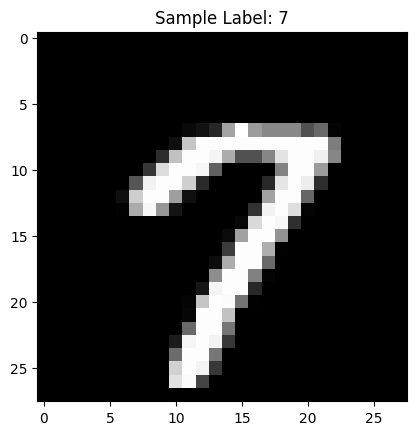

In [3]:
def display_sample_image_nm(loader_nm):
    data_iter_nm = iter(loader_nm)
    images_nm, labels_nm = next(data_iter_nm)
    plt.imshow(images_nm[6].numpy().squeeze(), cmap='gray')
    plt.title(f"Sample Label: {labels_nm[6]}")
    plt.show()
display_sample_image_nm(train_loader_nm)

### Step 4: Define the Neural Network
- Define a classifier using the PyTorch Module class, comprising three fully connected layers.
- Implement the forward pass where data is reshaped, passed through layers with ReLU activations, and a softmax layer is not applied since `nn.CrossEntropyLoss`() does this internally. Applying softmax explicitly before passing it to `nn.CrossEntropyLoss()` can lead to incorrect training dynamics
- These dynamics can lead to models that do not learn effectively, generalize poorly on new data, or exhibit unstable training patterns.

In [4]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #x = F.softmax(self.fc3(x), dim=1)
        return x

### Step 5: Set Up Loss Function and Optimize
- **CrossEntropyLoss:** Used for multi-class classification tasks.
- **Adam Optimizer:** A method for stochastic optimization with a set learning rate of 0.001.

In [5]:
model = MNISTClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Step 6: Training the Model and Save the model at each epoch


- Train the model over multiple epochs, keeping track of loss and accuracy, adjusting weights using backpropagation.

In [6]:
# Define the path for saving the model
model_path = './mnist_model.pth'

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images_nm, labels_nm in train_loader_nm:
        optimizer.zero_grad()
        outputs_nm = model(images_nm)
        loss = criterion(outputs_nm, labels_nm)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted_train = torch.max(outputs_nm.data, 1)
        total_train += labels_nm.size(0)
        correct_train += (predicted_train == labels_nm).sum().item()

    training_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader_nm)}, Train Accuracy: {training_accuracy:.2f}%")

    # Save the model at the end of each epoch
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

Epoch 1/10, Loss: 0.37481267722065387, Train Accuracy: 88.73%
Model saved to ./mnist_model.pth
Epoch 2/10, Loss: 0.17202637981631355, Train Accuracy: 94.79%
Model saved to ./mnist_model.pth
Epoch 3/10, Loss: 0.1267061657609859, Train Accuracy: 96.16%
Model saved to ./mnist_model.pth
Epoch 4/10, Loss: 0.09927949833292474, Train Accuracy: 96.91%
Model saved to ./mnist_model.pth
Epoch 5/10, Loss: 0.08712155936009833, Train Accuracy: 97.26%
Model saved to ./mnist_model.pth
Epoch 6/10, Loss: 0.07534124410953492, Train Accuracy: 97.61%
Model saved to ./mnist_model.pth
Epoch 7/10, Loss: 0.06566268131151787, Train Accuracy: 97.92%
Model saved to ./mnist_model.pth
Epoch 8/10, Loss: 0.059369419159036055, Train Accuracy: 98.07%
Model saved to ./mnist_model.pth
Epoch 9/10, Loss: 0.054660805524872944, Train Accuracy: 98.19%
Model saved to ./mnist_model.pth
Epoch 10/10, Loss: 0.0482834904636594, Train Accuracy: 98.41%
Model saved to ./mnist_model.pth


### Step 7: Testing the Model
- Evaluate the model on the test dataset without updating weights, calculating overall accuracy.

In [7]:
# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images_nm, labels_nm in test_loader_nm:
        outputs_nm = model(images_nm)
        _, predicted = torch.max(outputs_nm.data, 1)
        total += labels_nm.size(0)
        correct += (predicted == labels_nm).sum().item()

accuracy = 100 * correct / total
print(f"Model accuracy on test set: {accuracy}%")

Model accuracy on test set: 97.1%


### Step 8: Display Prediction on Test Data

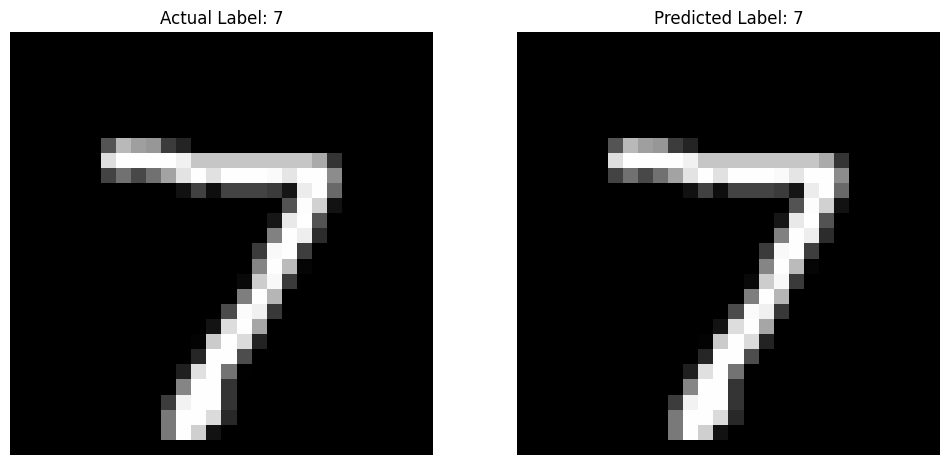

In [8]:
def display_prediction_nm(loader_nm):
    model.eval()  # Ensure the model is in evaluation mode
    data_iter_nm = iter(loader_nm)
    images_nm, labels_nm = next(data_iter_nm)
    outputs_nm = model(images_nm[:1])  # Get the output for the first image
    _, predicted_nm = torch.max(outputs_nm, 1)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(images_nm[0].numpy().squeeze(), cmap='gray')
    ax[0].set_title(f"Actual Label: {labels_nm[0]}")
    ax[0].axis('off')

    ax[1].imshow(images_nm[0].numpy().squeeze(), cmap='gray')
    ax[1].set_title(f"Predicted Label: {predicted_nm.item()}")
    ax[1].axis('off')

    plt.show()

# Display prediction for the first image in the test set
display_prediction_nm(test_loader_nm)
